In [2]:
from datetime import datetime,date,time
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from pandas.tseries.offsets import Day
import pathlib as pl

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

/home/techstar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
filepath = pl.Path("/home/techstar/data/pyprojects/metro_cq/sr_wkd.csv")

In [4]:
df = pd.read_csv(filepath)
df['datetime']=pd.to_datetime(df['datetime'])
df = df.set_index("datetime")

In [5]:
Max= df.max()['count']
Min= df.min()['count']
print(Max,Min)

116536 50


In [11]:
X = (df-Min)/(Max-Min)

In [53]:
TIMESTEPS = 36 * 5
STEP = 36 * 1

serieses=[]
nextday=[]

for i in range(0,len(X)-TIMESTEPS,STEP):
    serieses.append(np.array(X.iloc[i: i + TIMESTEPS]))
    nextday.append(np.array(X.iloc[i + TIMESTEPS:i+TIMESTEPS+STEP]))

In [69]:
X_train=np.array(serieses[:-6]);Y_train=np.array(nextday[:-6])
X_test=np.array(serieses[-6:]);Y_test=np.array(nextday[-6:])

In [75]:
print(X_train.shape)
print(Y_train.shape)
X_train=X_train.reshape(X_train.shape[0],5,36)
#X_train = X_train.transpose((0,2,1))
Y_train=Y_train.reshape(Y_train.shape[0],Y_train.shape[1])
print(X_train.shape)
print(Y_train.shape)
X_test = X_test.reshape(X_test.shape[0],5,36)
#X_test = X_test.transpose((0,2,1))
Y_test = Y_test.reshape(Y_test.shape[0],36)

(25, 180, 1)
(25, 36, 1)
(25, 5, 36)
(25, 36)


In [76]:
model = Sequential()
#model.add(LSTM(96, input_shape=(7,24), init="normal"))
model.add(LSTM(192, input_shape=(5,36), kernel_initializer="normal"))
model.add(Dense(36,kernel_initializer="normal"))


In [77]:
model.compile(loss='mean_squared_error', 
              optimizer=keras.optimizers.SGD(lr=0.1))

In [82]:
model.fit(X_train, Y_train, epochs=100,batch_size=10, shuffle=True,verbose=2,validation_split=0.2)

Train on 20 samples, validate on 5 samples
Epoch 1/100
 - 0s - loss: 9.2449e-04 - val_loss: 4.3831e-04
Epoch 2/100
 - 0s - loss: 9.1485e-04 - val_loss: 4.3835e-04
Epoch 3/100
 - 0s - loss: 9.1840e-04 - val_loss: 4.3868e-04
Epoch 4/100
 - 0s - loss: 9.2537e-04 - val_loss: 4.3820e-04
Epoch 5/100
 - 0s - loss: 9.1749e-04 - val_loss: 4.3853e-04
Epoch 6/100
 - 0s - loss: 9.1498e-04 - val_loss: 4.3866e-04
Epoch 7/100
 - 0s - loss: 9.1560e-04 - val_loss: 4.3881e-04
Epoch 8/100
 - 0s - loss: 9.1634e-04 - val_loss: 4.3899e-04
Epoch 9/100
 - 0s - loss: 9.1697e-04 - val_loss: 4.3873e-04
Epoch 10/100
 - 0s - loss: 9.2214e-04 - val_loss: 4.3915e-04
Epoch 11/100
 - 0s - loss: 9.1513e-04 - val_loss: 4.3921e-04
Epoch 12/100
 - 0s - loss: 9.1757e-04 - val_loss: 4.3891e-04
Epoch 13/100
 - 0s - loss: 9.1541e-04 - val_loss: 4.3899e-04
Epoch 14/100
 - 0s - loss: 9.1825e-04 - val_loss: 4.3866e-04
Epoch 15/100
 - 0s - loss: 9.2317e-04 - val_loss: 4.3911e-04
Epoch 16/100
 - 0s - loss: 9.1692e-04 - val_loss: 4

In [83]:
pred_test=model.predict(X_test)
pred_train = model.predict(X_train)

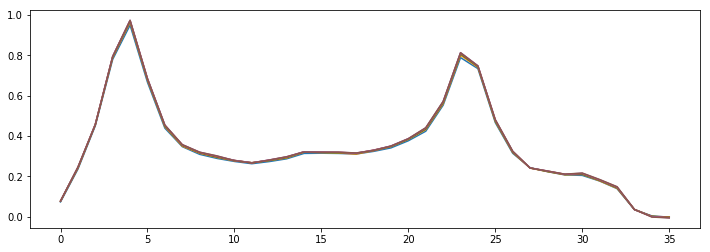

In [84]:
rcParams['figure.figsize'] = 12, 4
for i in range(pred_test.shape[0]):
    plt.plot(pred_test[i,:])
#    plt.plot(y[3,:])

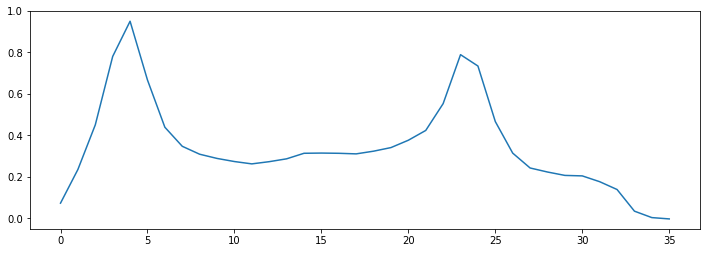

In [85]:
plt.plot(pred_test[0,:])
plt.show()

In [86]:
psg_test=pred_test*(Max-Min)+Min

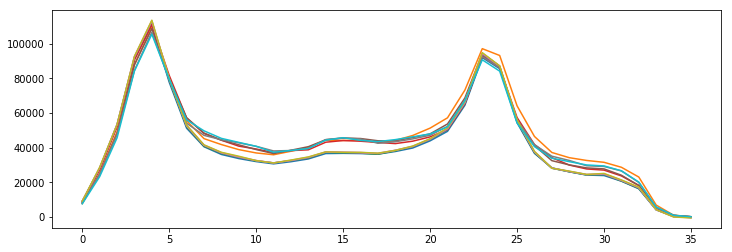

In [87]:
for i in range(5):
    plt.plot(psg_test[i,:])
    plt.plot(Y_test[i,:]*(Max-Min)+Min)
plt.show()

In [88]:
Y_test.shape

(6, 36)

In [89]:
model.save("psg_model1.h5")

In [134]:
from keras.models import load_model
model = load_model('psg_model1.h5')

In [90]:
(X_test.shape,Y_test.shape)

((6, 5, 36), (6, 36))

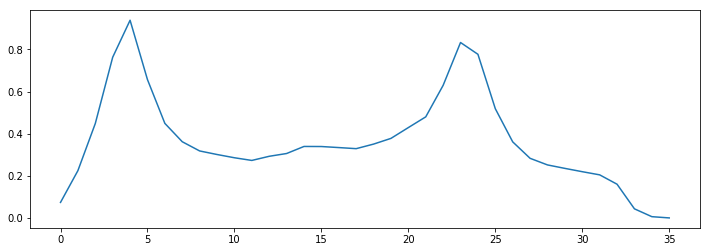

In [92]:
plt.plot(X_test[0,0,:])

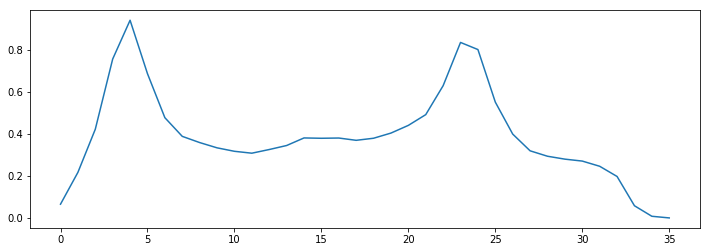

In [93]:
plt.plot(Y_test[0,:])

In [74]:
X_test.reshape(X_test.shape[0],5,36)

array([[[7.39745549e-02, 2.24790962e-01, 4.48302800e-01, ...,
         4.34987896e-02, 6.34411002e-03, 4.29236131e-04],
        [8.74439847e-02, 2.56176708e-01, 4.87895541e-01, ...,
         3.28022252e-02, 6.01789056e-03, 4.29236131e-04],
        [7.66959120e-02, 2.32045053e-01, 4.49753618e-01, ...,
         3.08620778e-02, 5.68308638e-03, 3.00465292e-04],
        [6.45656989e-02, 2.12961214e-01, 4.28721048e-01, ...,
         3.44161530e-02, 5.09932524e-03, 3.77727796e-04],
        [6.31406349e-02, 2.15794173e-01, 4.27579280e-01, ...,
         4.25029617e-02, 6.94504061e-03, 4.29236131e-04]],

       [[8.74439847e-02, 2.56176708e-01, 4.87895541e-01, ...,
         3.28022252e-02, 6.01789056e-03, 4.29236131e-04],
        [7.66959120e-02, 2.32045053e-01, 4.49753618e-01, ...,
         3.08620778e-02, 5.68308638e-03, 3.00465292e-04],
        [6.45656989e-02, 2.12961214e-01, 4.28721048e-01, ...,
         3.44161530e-02, 5.09932524e-03, 3.77727796e-04],
        [6.31406349e-02, 2.15794173e-0

In [13]:
arg_min_max = {'Min':int(Min),"Max":int(Max)}

In [7]:
import json


In [14]:
with open("argmm.json","w") as f:
    json.dump(arg_min_max,f)

In [16]:
type(int(Min))

int